# Разложение СЗ возмущенной матрицы в ряд по дробным степеням

In [1]:
using SymPy
using LinearAlgebra

In [15]:
n = 5
a = 2;   b = 3;

A = diagm(0=>b*ones(Sym, n),1=>a*ones(Sym, n-1))

5×5 Array{Sym,2}:
 3  2  0  0  0
 0  3  2  0  0
 0  0  3  2  0
 0  0  0  3  2
 0  0  0  0  3

In [16]:
x = Sym("x")
A[2,1] = x
A[3,1] = x^2
A[3,2] = x
A[4,2] = x
A[5,1] = x
A[5,2] = x^2
A

5×5 Array{Sym,2}:
   3    2  0  0  0
   x    3  2  0  0
 x^2    x  3  2  0
   0    x  0  3  2
   x  x^2  0  0  3

In [17]:
l0 = eigvals(subs(A, x, 0))[1]

3

In [18]:
l = Sym("lamda")
# char_p = simplify(det(A - diagm(0=>l*ones(Sym, n))))   # or: A - l0*Matrix{Sym}(1I,n,n)
char_p = as_expr(A[:charpoly](l))

 5       4    3                2 ⎛     2             ⎞     ⎛    2             
λ  - 15⋅λ  + λ ⋅(-4⋅x + 90) + λ ⋅⎝- 4⋅x  + 32⋅x - 270⎠ + λ⋅⎝16⋅x  - 84⋅x + 405

⎞       2             
⎠ - 12⋅x  + 56⋅x - 243

In [19]:
g = symbols("gamma")              # do not use (.., positive=true) because of crossections calculation
foo = simplify(char_p(l=>l0+x^g)) # или simplify(charpoly[:replace](l,l0+x^g)) или replace(subs(charpoly, l, l0+x^g))

         5⋅γ      γ + 2      2⋅γ + 1      2⋅γ + 2      3⋅γ + 1
-16⋅x + x    - 8⋅x      - 4⋅x        - 4⋅x        - 4⋅x       

In [20]:
membs = collect(zip(args.(as_ordered_terms(foo)*pi^0.5)...))[2] # pi^0.5 - formula failed when there is no coeffs near x^_

(x, x^(5*gamma), x^(gamma + 2), x^(2*gamma + 1), x^(2*gamma + 2), x^(3*gamma + 1))

In [21]:
pows = expand_log.(log.(x,membs),force=true)

(1, 5*gamma, gamma + 2, 2*gamma + 1, 2*gamma + 2, 3*gamma + 1)

In [29]:
k = length(pows)
gammas = []
for i=1:k, j=1:n-1
    ex = pows[i]-pows[j]
    if free_symbols(ex) != []
        solution = solve(ex)
        if !isempty(solution) && solution[1] > 0
            push!(gammas, solution[1])
        end
    end
end

g0 = minimum(gammas)

1/5

In [23]:
# z,a,b,c,d,e = symbols("z,a,b,c,d,e")
z = Sym("z")
K = 6
l! = l0+sum([symbols("c_$i",real=true)*z^i for i=1:K])
char_p = char_p(x=>z^(1/g0),l=>l!)[:expand]();

In [24]:
# убрать все Sym(0) из coeffs(char_p,z) и получить первые K ненулевых коэффициента, начиная с младшей степени
char_coeffs = filter(i->i!=Sym(0),coeffs(char_p,z))[1:K]

6-element Array{Sym,1}:
                                                                                                                                                                   c_1^5 - 16
                                                                                                                                                                  5*c_1^4*c_2
                                                                                                                                       5*c_1^4*c_3 + 10*c_1^3*c_2^2 - 4*c_1^2
                                                                                                        5*c_1^4*c_4 + 20*c_1^3*c_2*c_3 - 4*c_1^3 + 10*c_1^2*c_2^3 - 8*c_1*c_2
                                                      5*c_1^4*c_5 + 20*c_1^3*c_2*c_4 + 10*c_1^3*c_3^2 + 30*c_1^2*c_2^2*c_3 - 12*c_1^2*c_2 + 5*c_1*c_2^4 - 8*c_1*c_3 - 4*c_2^2
 5*c_1^4*c_6 + 20*c_1^3*c_2*c_5 + 20*c_1^3*c_3*c_4 + 30*c_1^2*c_2^2*c_4 + 30*c_1^2*c_2*c_3^2 - 12*c_1^2*c_

In [25]:
solve(char_coeffs)

1-element Array{Dict{Sym,Sym},1}:
 Dict(c_4=>2*2^(1/5)/5,c_6=>2^(4/5)/25,c_3=>2^(2/5)/5,c_2=>0,c_5=>0,c_1=>2^(4/5))

In [85]:
X = [1e-2, 1e-4, 1e-6];

In [100]:
vals = [N(l!(z=>X[i]^g0,solve(char_coeffs)[1]...)) for i=1:3]

3-element Array{Float64,1}:
 3.7216147644877036
 3.277287559063205 
 3.109929630062013 

In [101]:
num_vals = real.([filter(i->isreal(i),eigvals(N(subs(A,x,X[i]))))[1] for i=1:3])

3-element Array{Float64,1}:
 3.7224021418705333
 3.2772886971980046
 3.1099296317929253

In [102]:
Y = num_vals - vals;

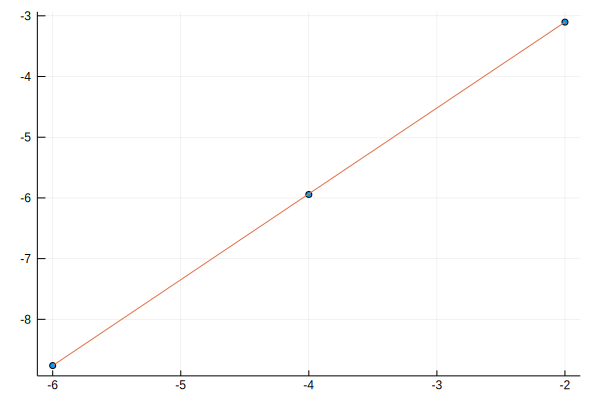

In [103]:
using Plots
scatter(log.(10,X),log.(10,Y),legend=false,ms=3)
plot!(log.(10,[X[1],X[3]]),log.(10,[Y[1],Y[3]]))